#Red Neuronal - Clasificación de imagenes



Nos conectamos a drive para acceder al dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos librerias

In [ ]:
import numpy as np
from os import listdir
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
def Cargar_img(directorio: str, img_size: tuple[int, int], color_mode: str):

    X, y = [], []
    class_names = listdir(directorio)
    for i, img_fold in enumerate(class_names):

        images_path = listdir(os.path.join(directorio, img_fold))
        y.extend([i]*len(images_path))
        for img_name in images_path:
            image = tf.keras.utils.load_img(
                os.path.join(directorio, img_fold, img_name),
                color_mode = color_mode,
                target_size= img_size,
                interpolation="nearest",
                keep_aspect_ratio=False,
            )

            image = tf.keras.utils.img_to_array(image, data_format="channels_last").astype(np.uint8)

            X.append(image)

    print("clases encontradas:", class_names)
    X = np.array(X)
    y = np.array(y)

    i = np.arange(0, y.shape[0])
    np.random.shuffle(i)

    return X[i], y[i]

Accedemos a la carpeta de Drive

In [ ]:
X, y = Cargar_img(
    directorio = "/content/drive/MyDrive/ecommerce products",
    img_size = (128,128),
    color_mode = "rgb"
)

clases encontradas: ['tshirt', 'sofa', 'jeans', 'tv']


#creación de clases y gráfica de asignación de clase a los datos

Se crea una lista con las clases correspondientes a los datos, cada posición corresponde a un tipo de producto en e-commerce.

In [ ]:
clases = ['tshirt', 'sofa', 'jeans', 'tv']

Se muestra un ejemplo de cómo se diferencia cada clase.

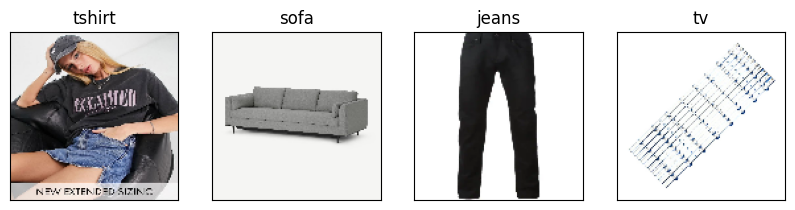

In [ ]:
_, axes = plt.subplots(1, 4, figsize=(10,10))
for i in range(len(clases)):
    axes[i].imshow(X[ y == i ][0])
    axes[i].set_title(clases[i])

    axes[i].xaxis.set_tick_params(labelbottom=False)
    axes[i].yaxis.set_tick_params(labelleft=False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()

Generamos un diagrama de barras para visualizar la distribución de los datos.

Se puede concluir que todas las clases estan balanceadas.

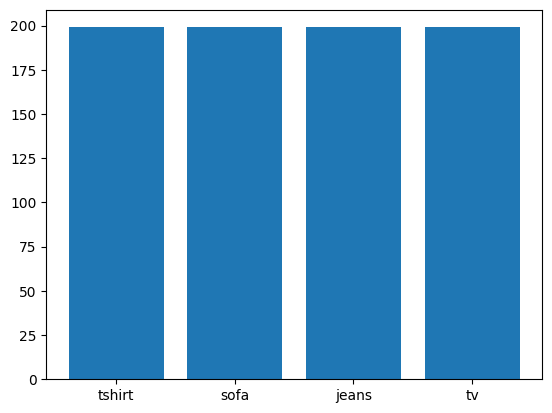

In [ ]:
plt.figure()

plt.bar(clases, np.bincount(y))

plt.show()

Se hace una normalización de los datos.

In [ ]:
X_scaled = X / 255

Se realiza una distribución de los datos de 70% para entrenamiento y 30% para pruebas.

Esta distribución se pretende dejar una cantidad significativa  de datos de prueba para entregar resultados más precisos, sin sacrificar los datos de entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, stratify=y)

In [ ]:
img_size = (128, 128)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

#Arquitectura del modelo

Se seleccionó una arquitectura de 1 capa de entrada, 14 capas intermedias y 3 densas.



In [ ]:
modelo = tf.keras.Sequential([
     tf.keras.layers.Conv2D(input_shape=(128,128,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
     tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),


     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),


     tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
     tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
     tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(256,activation = "relu"),
     tf.keras.layers.Dense(128,activation = "relu"),
     tf.keras.layers.Dense(len(clases), activation = "softmax")
])


modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,057,540 (61.25 MB)

 Trainable params: 16,057,540 (61.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_data_augmenter = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 45,    # rotar imagenes hasta 45 grados aleatoriamente
    shear_range=0.2,        # mover la imagen para formar un paralelogramo, hasta en un 20% aleatoriamente
    zoom_range=0.2,         # aplicar zoom hasta del 20% aleatoriamente
    horizontal_flip=True,   # rotar horizontalmente la imagen aleatoriamente
    validation_split=0.25   # fraccion de las imagenes que seran usadas para validar el modelo
)

# Entrenamiento del modelo

- la metrica a usar es la de la precisión.


- En la sección de callback se usa EarlyStopping para que cuando en aproximadamente 5 ephocs no se mejore el accuracy lo que va a hacer es que va a detener el modelo informando que se alcanzó la mejor exactitud sin ejecutar las que quedan más adelante.


- Realizamos el entrenamiento del modelo con 60 epocas.

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

# Compilacion
modelo.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
CB = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)
]

# Entrenamiento
history = modelo.fit(
    train_data_augmenter.flow(X_train, y_train, subset="training"),
    validation_data = train_data_augmenter.flow(X_train, y_train, subset="validation"), epochs=60, callbacks=CB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2149 - loss: 1.3869 - val_accuracy: 0.2446 - val_loss: 1.3864
Epoch 2/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.2897 - loss: 1.3761 - val_accuracy: 0.4101 - val_loss: 1.3325
Epoch 3/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.4781 - loss: 1.2706 - val_accuracy: 0.4317 - val_loss: 1.2186
Epoch 4/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 267ms/step - accuracy: 0.5275 - loss: 1.0791 - val_accuracy: 0.5971 - val_loss: 0.9555
Epoch 5/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.6133 - loss: 0.9745 - val_accuracy: 0.6475 - val_loss: 0.8945
Epoch 6/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.5712 - loss: 1.0047 - val_accuracy: 0.6475 - val_loss: 0.8774
Epoch 7/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.6368 - loss: 0.8742 - val_accuracy: 0.7698 - val_loss: 0.8312
Epoch 8/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.7006 - loss: 0.8187 - val_accuracy: 0.74

Se muestran los filtros anteriormente generados en la arquitectura del modelo.

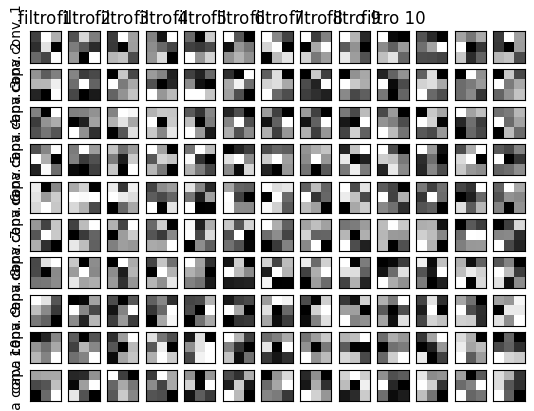

In [ ]:
# filtrar capas convolucionales
conv_layers = [layer for layer in modelo.layers if "conv" in layer.name ]

np.random.seed(1)

_, axes = plt.subplots(len(conv_layers), 13)

for i, layer in enumerate(conv_layers):
    axes[i,0].set_ylabel(f"capa conv. {i+1}")
    axes[0,i].set_title(f"filtro {i+1}")

    # obtener los filtros de cada capa convolucional
    filters, biases = layer.get_weights()
    # reescalar filtros para poder ser visualizados
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # obtener 4 filtros al azar para ser visualizados
    sel = np.random.randint(0, filters.shape[-1], 13)
    filters_selected = filters[:,:,:, sel]
    filters_selected = np.moveaxis(filters_selected, -1, 0)
    filters_selected = np.mean(filters_selected, axis=3, keepdims=True)
    # filters_selected = filters_selected[:,:,:,0]
    for j, filter in enumerate(filters_selected):
        # visualizar filtro
        axes[i,j].imshow(filter, cmap="gray")

        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

plt.show()

Se muestra con un producto cómo se visualiza cada capa, esto da una idea de cuales caracteristicas se encuentra validando el modelo.

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


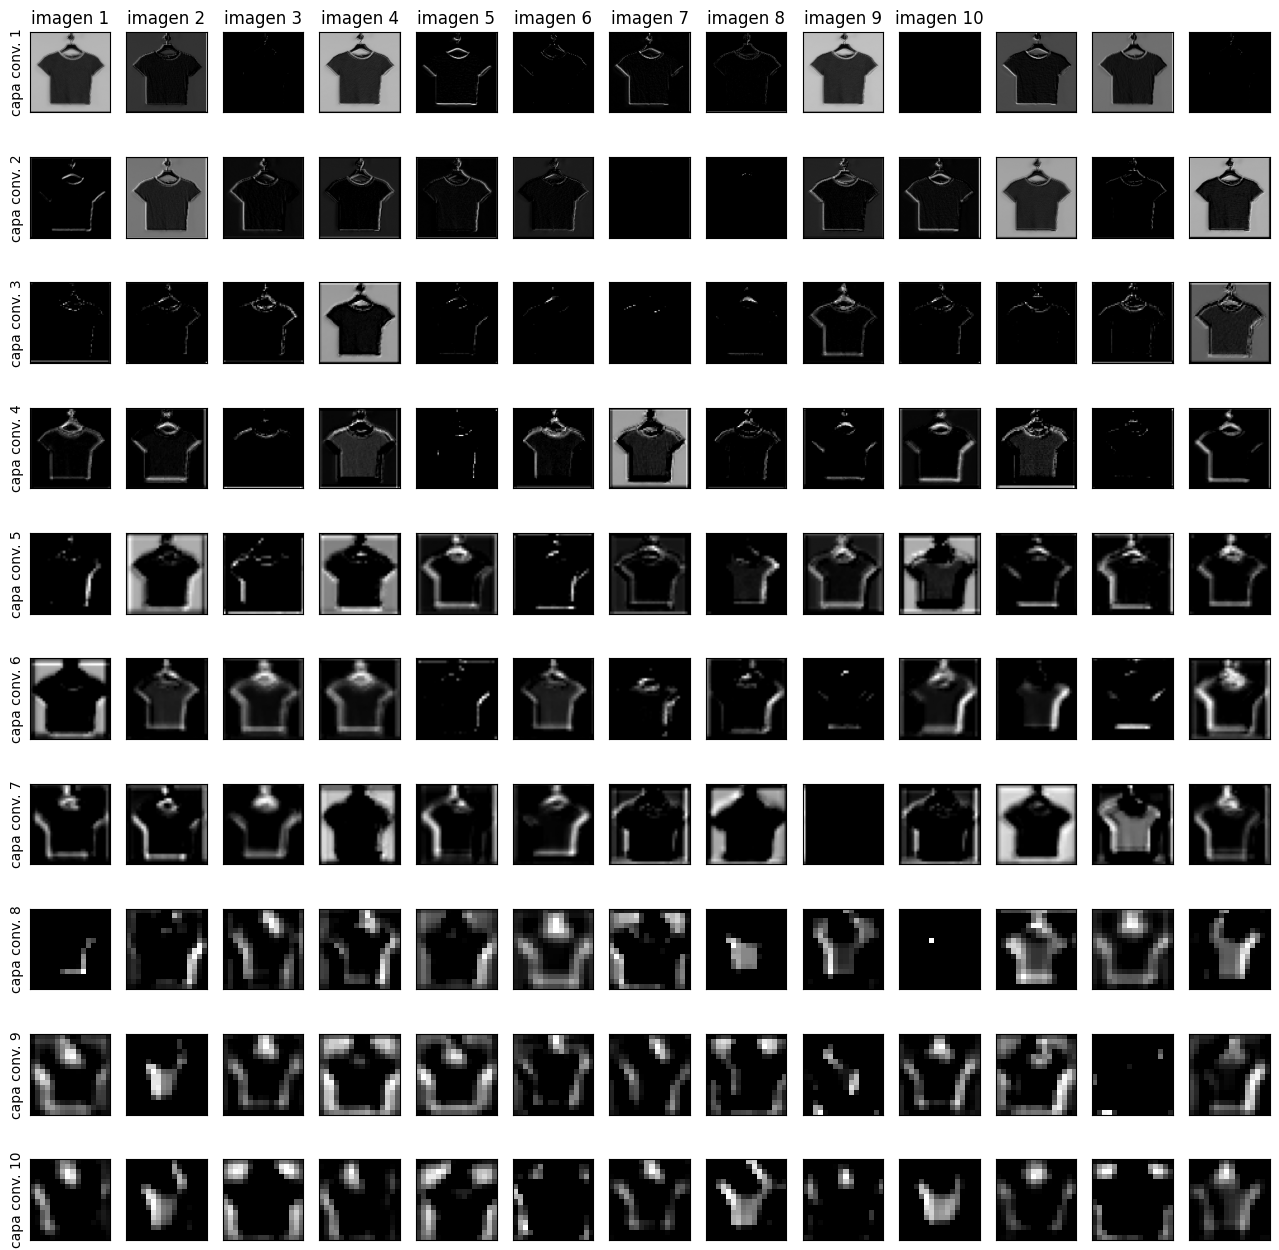

In [ ]:
_, axes = plt.subplots(len(conv_layers), 13, figsize=(16,16))

np.random.seed(3)

# modelo que nos dara la salida de cada capa convolucional
vis_model = tf.keras.models.Model(
    inputs = modelo.inputs,
    outputs = [ layer.output for layer in conv_layers ]
)

# aplicar el modelo hasta cada capa convolucional
feature_maps = vis_model.predict(np.expand_dims(X_test[40], axis=0))

for i, f_map in enumerate(feature_maps):
    axes[i,0].set_ylabel(f"capa conv. {i+1}")
    axes[0,i].set_title(f"imagen {i+1}")

    # filtrar imagenes resultantes sin caracteristicas extraidas
    f_map = f_map[:,:,:, np.any(f_map[0,:,:,:] > 0, axis=(0,1)) ]

    # seleccionar 4 imagenes con el filtro aplicado para mostrar
    sel = np.random.randint(0, f_map.shape[-1], 13)
    feature_map_selected = f_map[:,:,:, sel]
    feature_map_selected = feature_map_selected[0]
    feature_map_selected = np.moveaxis(feature_map_selected, -1, 0)
    for j, image in enumerate(feature_map_selected):
        # visualizar imagen
        axes[i,j].imshow(image, cmap="gray")

        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

plt.show()

In [ ]:
import numpy as np
def plot_imagen_classification(modelo, imagen, clases, y_true=None):
    if len(imagen.shape) == 3:
        imagen = np.expand_dims(imagen, axis=0)

    predictions = modelo.predict(imagen)
    predicted_class = np.argmax(predictions)

    fig, (img_ax, prob_ax) = plt.subplots(1, 2, figsize=(10,3))

    img_ax.imshow(imagen[0], cmap=plt.get_cmap('gray'))

    img_ax.xaxis.set_tick_params(labelbottom=False)
    img_ax.yaxis.set_tick_params(labelleft=False)
    img_ax.set_xticks([])
    img_ax.set_yticks([])

    prob_ax.bar(clases, predictions[0], label="otras clases", color="blue")
    prob_ax.bar(clases[predicted_class], predictions[0, predicted_class], label=f"predicha ({clases[predicted_class]})", color="red")

    if y_true != None:
        prob_ax.bar(clases[y_true], predictions[0, y_true], label=f"verdadera ({clases[y_true]})", color="green")

    prob_ax.legend()
    prob_ax.set_ylabel("probabilidad")

    plt.show()

# Validación del modelo

A continuación se muestra cómo se clasifican algunas de las imagenes que contiene el dataset con una distribución de probabilidad dada por el criterio de softmax.

Se puede concluir que el modelo tiene una buena precisión a la hora de clasificar los datos.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


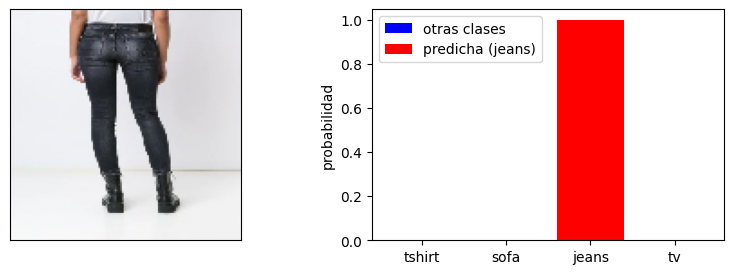

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


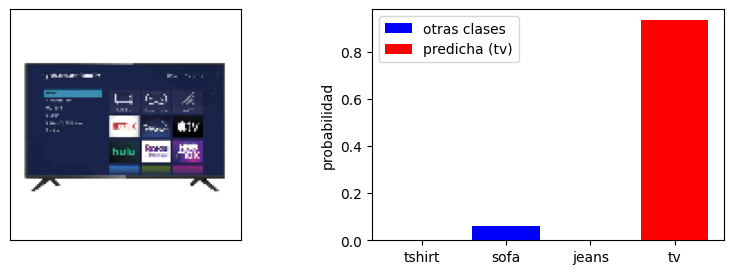

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


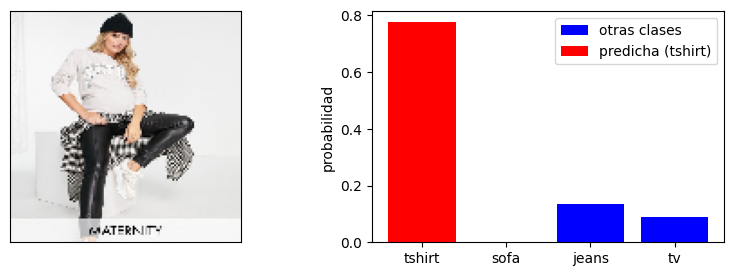

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


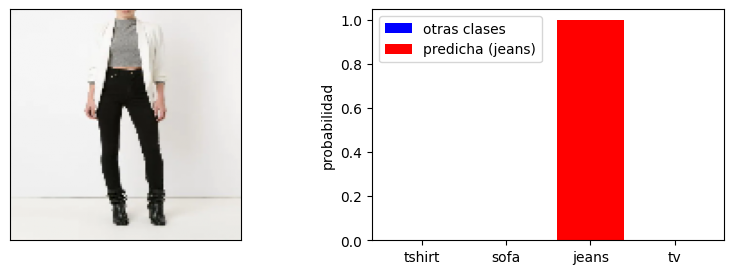

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


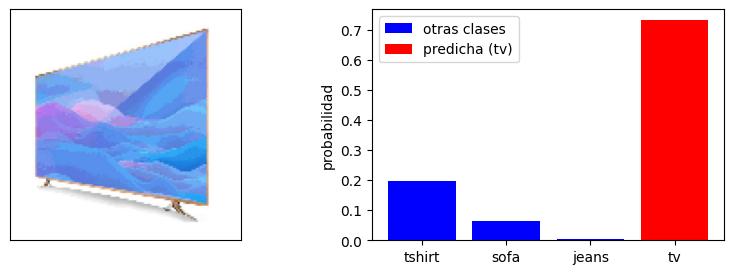

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


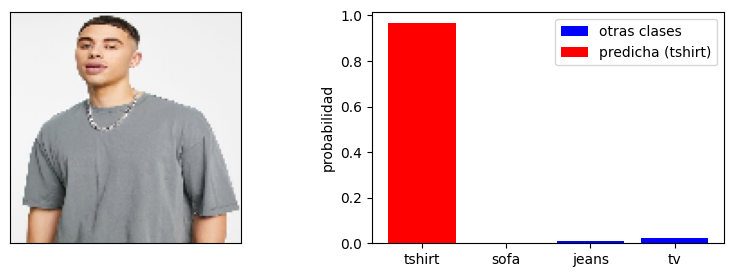

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


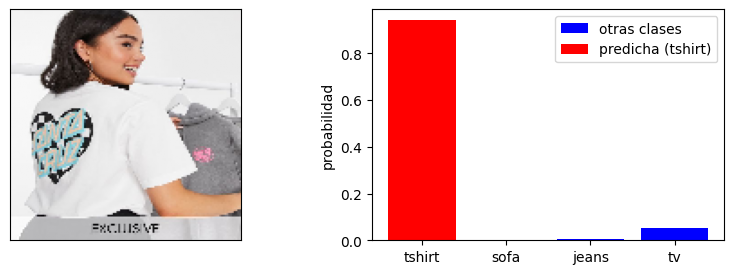

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


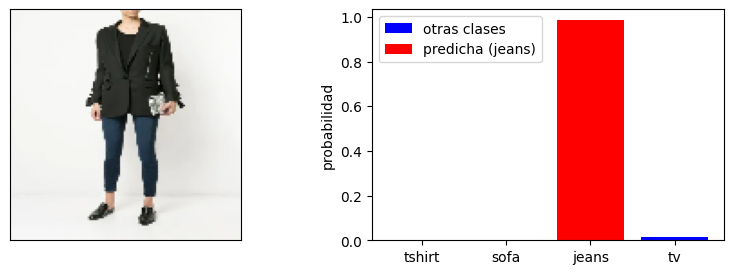

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


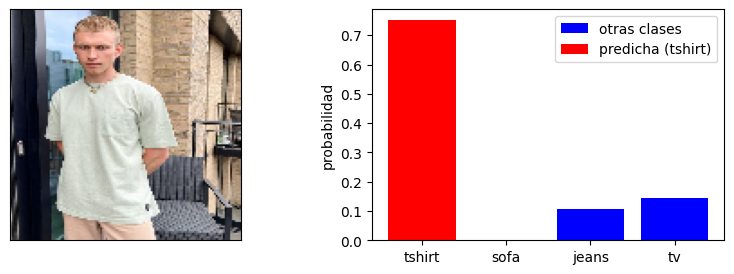

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


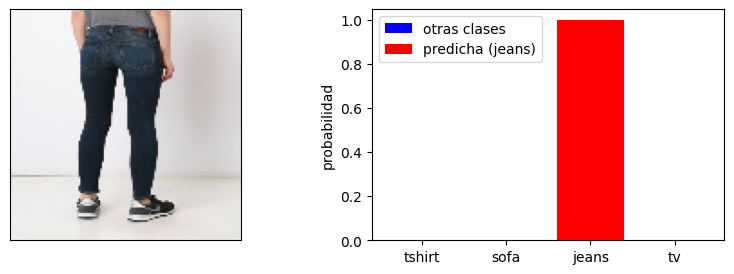

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


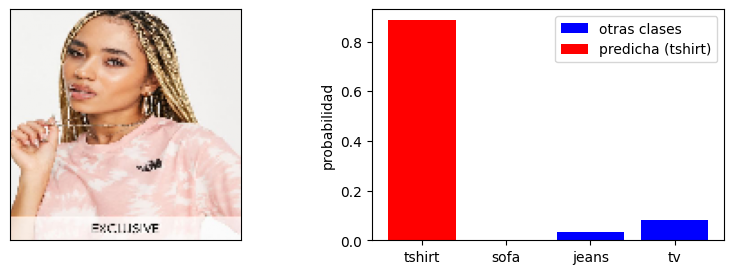

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


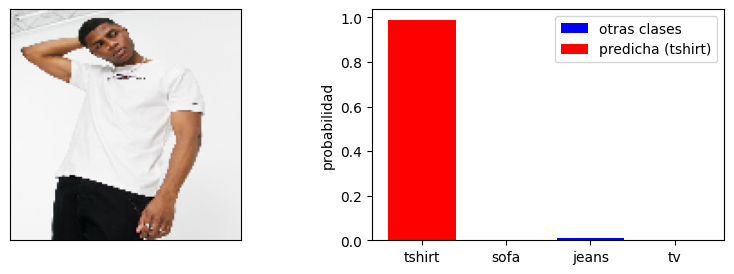

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


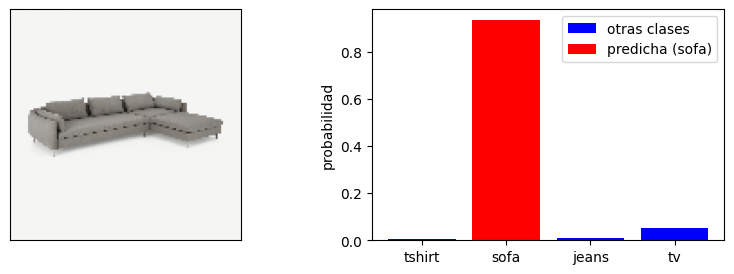

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


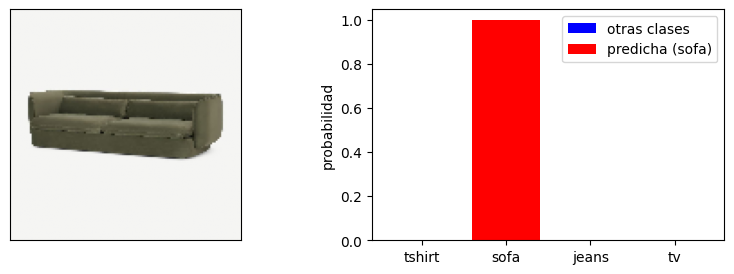

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


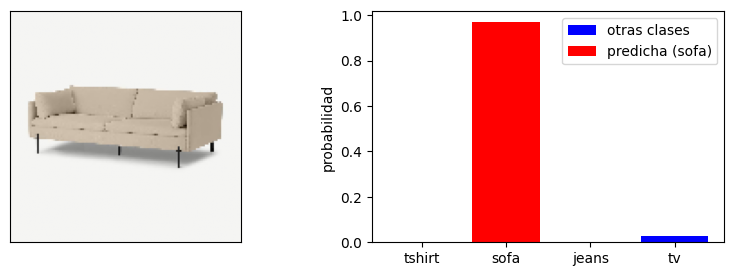

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


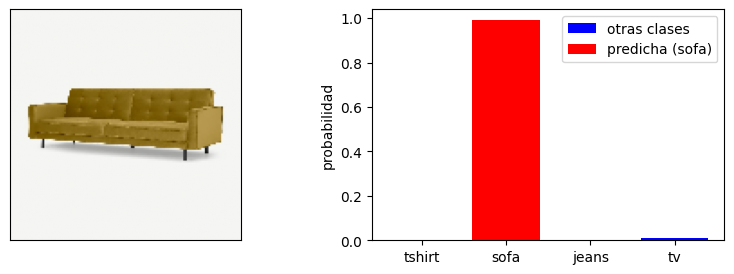

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


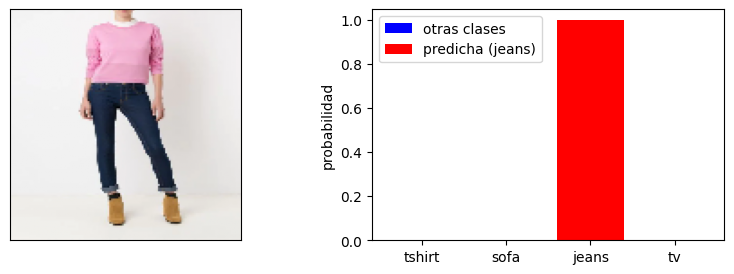

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


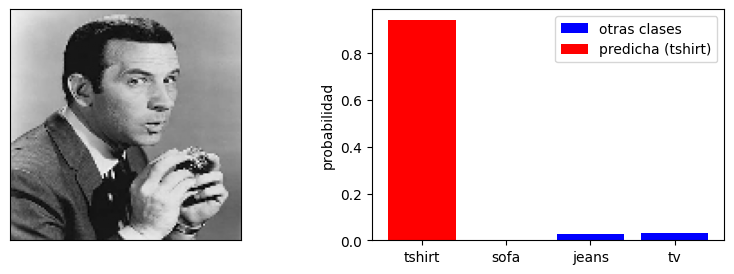

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


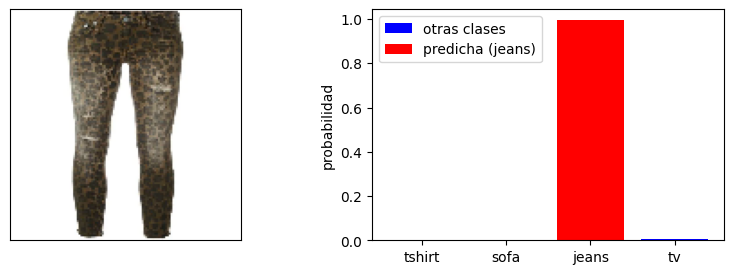

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


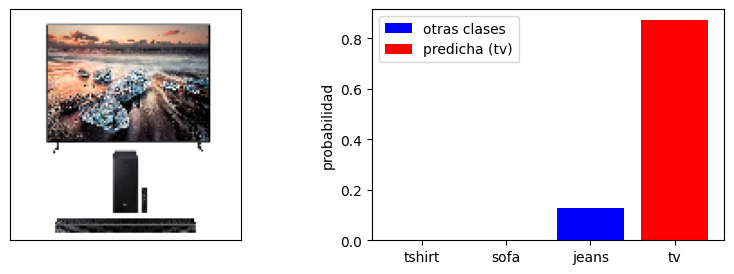

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


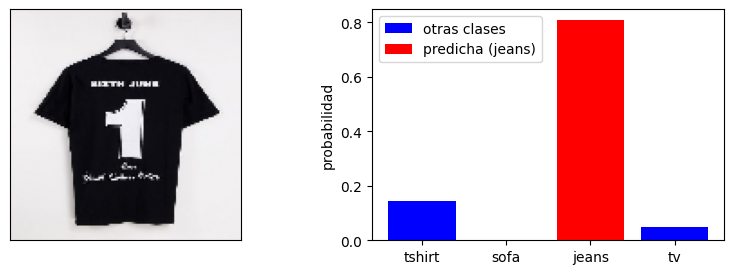

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


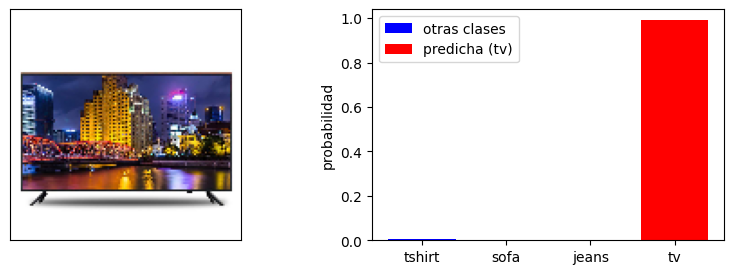

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


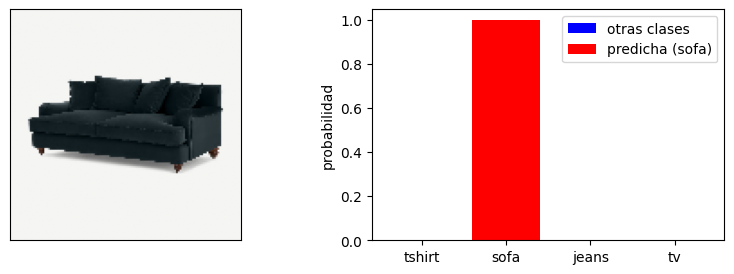

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


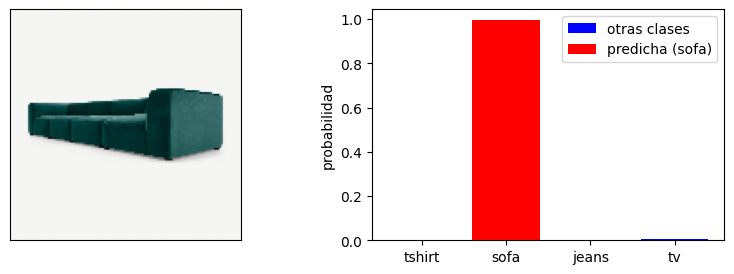

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


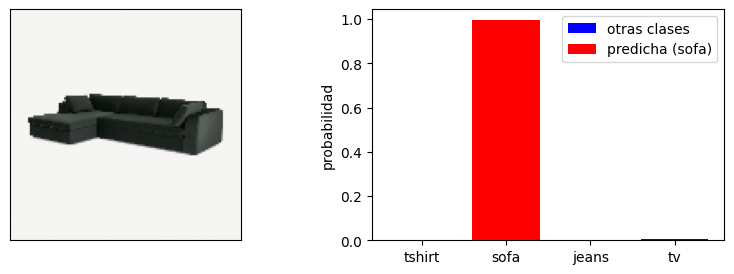

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


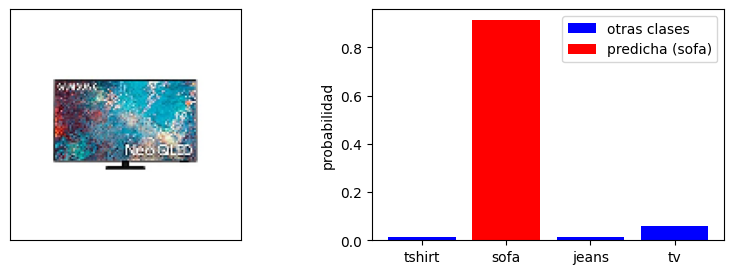

In [ ]:
for i in range(120, 146):
  #print(len(x_test[i].shape))
  plot_imagen_classification(modelo, X_test[i], clases)

Se presenta una gráfica para observar el comportamiento de la exactitud del modelo con respecto a cada una de las épocas, comparando con su valor de entrenamiento y pruebas, en el caso de la arquitectura usada se logró un máximo de accuracy:0.8991 - val_accuracy: 0.9137

Esto indica que el modelo tiene una buena precisión tanto en entrenamiento como en pruebas

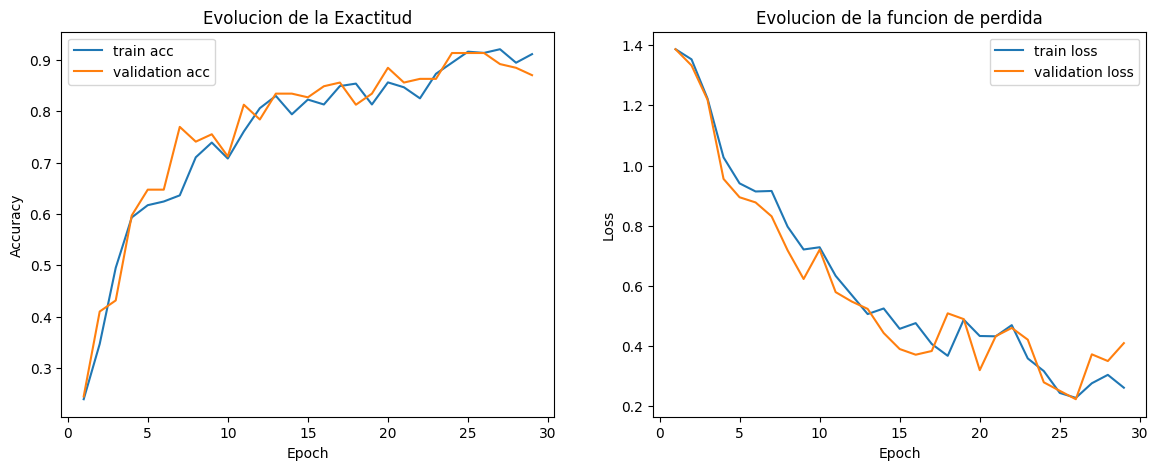

In [ ]:
# graficas de la evolucion del acurracy y loss
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

history = history.history
epochs = range(1, len(history["accuracy"]) + 1)

# plot acurracy
ax1.plot(epochs, history["accuracy"], label="train acc")
ax1.plot(epochs, history["val_accuracy"], label="validation acc")

ax1.legend()
ax1.set_title("Evolucion de la Exactitud")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")


# plot loss
ax2.plot(epochs, history["loss"], label="train loss")
ax2.plot(epochs, history["val_loss"], label="validation loss")

ax2.legend()
ax2.set_title("Evolucion de la funcion de perdida")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")

plt.show()

Reporte de clasificación


ENTRENAMIENTO Y VALIDACION:

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       140
           1       0.91      1.00      0.96       139
           2       0.94      0.95      0.95       139
           3       0.96      0.78      0.86       139

    accuracy                           0.92       557
   macro avg       0.92      0.92      0.92       557
weighted avg       0.92      0.92      0.92       557


PRUEBA:

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 443ms/step
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        59
           1       0.88      1.00      0.94        60
           2       0.86      0.95      0.90        60
           3       0.98      0.68      0.80        60

    accuracy                           0.90       239
   macro avg       0.90      0.90      0.89       239
weighted avg       0.90      0.90      0.89       239



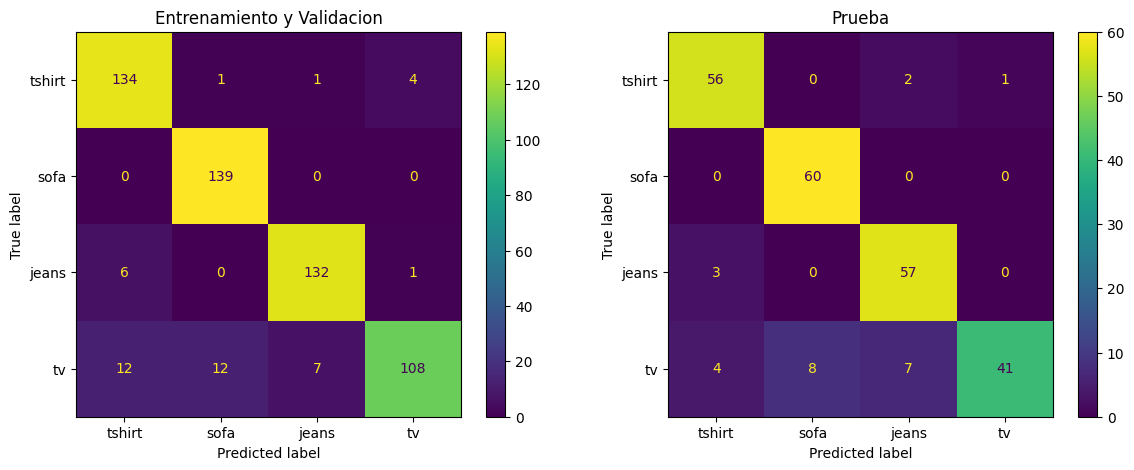

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

print("\nENTRENAMIENTO Y VALIDACION:\n")

y_pred = np.argmax(modelo.predict(X_train), axis=1)

print(classification_report(y_train, y_pred))
ConfusionMatrixDisplay.from_predictions(
    y_true = y_train,
    y_pred = y_pred,
    display_labels = clases,
    ax = ax1
)
ax1.set_title("Entrenamiento y Validacion")

print("\nPRUEBA:\n")

y_pred = np.argmax(modelo.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test,
    y_pred = y_pred,
    display_labels = clases,
    ax = ax2
)
ax2.set_title("Prueba")

plt.show()

In [ ]:
modelo.save("modelo_entrenado.keras")

In [ ]:
import pickle
with open("modelo.pkl", "wb") as f:
    pickle.dump(modelo, f)

In [14]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# Load the image and resize it
img = Image.open('sofa1.jpg').resize((128, 128)) # Resize image to match training shape
img_array = np.array(img)

img_array = img_array.astype('float32') / 255.0  # Normalizar valores de píxeles
img_array = np.expand_dims(img_array, axis=0)

# Load the model
model = load_model('modelo_entrenado.keras')
predictions = model.predict(img_array)

# Preprocess the image if your model requires it (e.g., scaling)
# img_array = img_array / 255.0  # Example: scaling pixel values to [0, 1]

# Make the prediction
clases = ['tshirt', 'sofa', 'jeans', 'tv']
predicted_class = clases[np.argmax(predictions)]
print(f"La imagen es clasificada como: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
La imagen es clasificada como: sofa
